Erst in Influx aufgenommen (2 min). 10 µL der Zellen dann zu 190 µL Hepes gegeben. Zellen also 1:20 verdünnt, Lactat auch 1:20 verdünnt

In [2]:
import sys
sys.path.insert(0, '..')  # Füge das übergeordnete Verzeichnis zum Python-Pfad hinzu
from utils_functions import to_float_array, df_d0, dataframe1


In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
file1 = "1 mM Lactat Efflux(3 vs 10 min)_MCT1.csv"
file2 = "1 mM Lactat Efflux(2min)_MCT1_PfFNT_Zellen1_1_verdünnt.csv"
df1 = pd.read_csv(file1, sep=';', decimal=',', skiprows=36, encoding='latin1')
df2 = pd.read_csv(file2, sep=';', decimal=',', skiprows=36, encoding='latin1')
# Ersetze "OVER" durch NaN in der gesamten DataFrame
df1 = df1.replace('OVER', np.nan)
df2 = df2.replace('OVER', np.nan)
df1.head()


,Startzeit:,14.11.2025 13:52:48,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Zyklus Nr.,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
3,Zeit [s],0,10,20,30,40,50,60,70,80,...,390,400,410,420,430,440,450,460,470,480
4,Temp. [øC],--,--,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--


In [4]:
Inkubation10 = dataframe1(df1, 3, 5, 6, 7)
Inkubation3= dataframe1(df1, 3, 8, 9, 10)
PfFNT_I = dataframe1(df1, 3, 11, 12, 13)

Kontrolle_E = dataframe1(df2, 3, 5, 6, 7)
MCT1_E= dataframe1(df2, 3, 8, 9, 10)
PfFNT_E = dataframe1(df2, 3, 11, 12, 13)
print(Inkubation10.head())
print(Inkubation3.head())

   Time  1.Messung  2.Messung  3.Messung  Mittelwerte  Standardabweichung
0   0.0   0.000000   0.000000   0.000000     0.000000            0.000000
1  10.0  -0.025907  -0.016378  -0.019743    -0.020676            0.004833
2  20.0  -0.065612  -0.025837  -0.055456    -0.048968            0.020665
3  30.0  -0.093377  -0.010413  -0.068270    -0.057353            0.042546
4  40.0  -0.105075  -0.012883  -0.075734    -0.064564            0.047100
   Time  1.Messung  2.Messung  3.Messung  Mittelwerte  Standardabweichung
0   0.0   0.000000   0.000000   0.000000     0.000000            0.000000
1  10.0  -0.010972  -0.030696  -0.004078    -0.015249            0.013815
2  20.0  -0.004817  -0.035933  -0.012352    -0.017701            0.016233
3  30.0   0.009545  -0.037382  -0.026408    -0.018082            0.024546
4  40.0   0.030597  -0.039754  -0.049362    -0.019506            0.043656


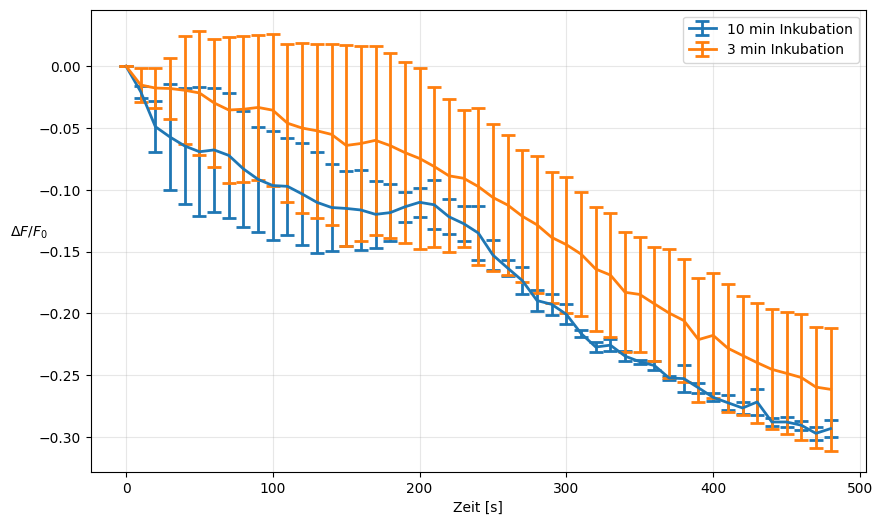

Abbildung gespeichert: ../figueres/MCT1_Efflux_3_10min_plot.png


In [6]:
import os
outdir = os.path.join('..', 'figueres')
os.makedirs(outdir, exist_ok=True)
filename = os.path.join(outdir, 'MCT1_Efflux_3_10min_plot.png')

plt.figure(figsize=(10, 6))

# Kontrolle Lactat
plt.errorbar(Inkubation10["Time"], Inkubation10["Mittelwerte"], 
             yerr=Inkubation10["Standardabweichung"],
             label="10 min Inkubation", linewidth=2, capsize=5, capthick=2)

# Kontrolle Hepes
plt.errorbar(Inkubation3["Time"], Inkubation3["Mittelwerte"],
             yerr=Inkubation3["Standardabweichung"],
             label="3 min Inkubation", linewidth=2, capsize=5, capthick=2)

# MCT1
plt.xlabel("Zeit [s]")
plt.ylabel(r'$\Delta F/F_0$', rotation=0, labelpad=18)
ax = plt.gca()
ax.yaxis.set_label_coords(-0.08, 0.5)
plt.legend()
plt.grid(True, alpha=0.3)

# Speichere die Abbildung als PNG
plt.savefig(filename, dpi=300, bbox_inches='tight')
plt.show()
print(f"Abbildung gespeichert: {filename}")

